In [35]:
import pandas as pd

In [36]:
iris_data=pd.read_csv('iris-data.csv')

In [37]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
iris_data.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [39]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [40]:
iris_data.describe

<bound method NDFrame.describe of      sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
5                5.4             3.9              1.7             0.4   
6                4.6             3.4              1.4             0.3   
7                5.0             3.4              1.5             NaN   
8                4.4             2.9              1.4             NaN   
9                4.9             3.1              1.5             NaN   
10               5.4             3.7              1.5             NaN   
11               4.8             3.4              1.6             NaN   
12               

In [41]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

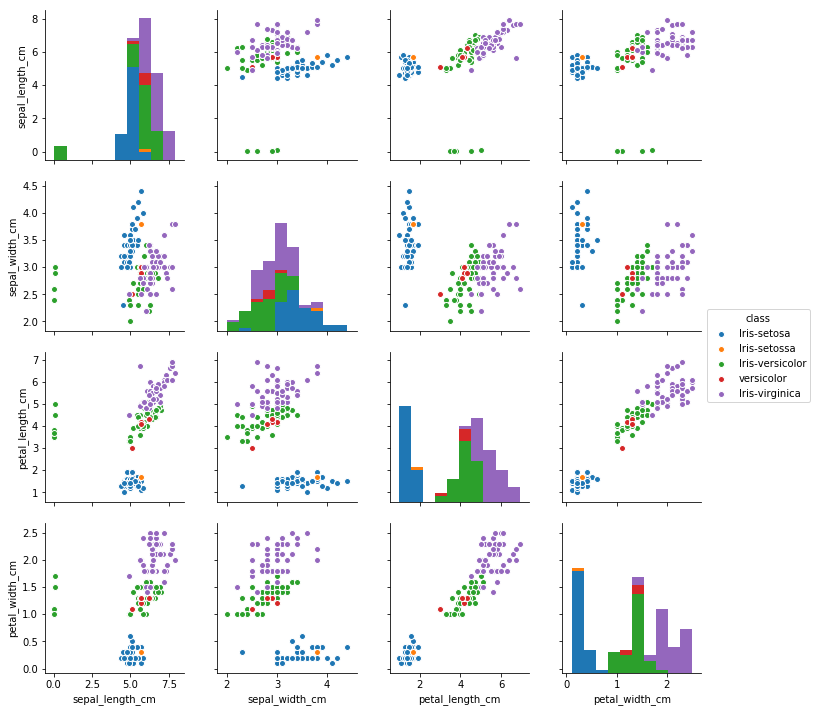

In [43]:
sb.pairplot(iris_data.dropna(), hue='class')

In [44]:
iris_data.loc[iris_data['class'] == 'versicolor' , 'class'] ='Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa' ,'class']='Iris-setosa'
iris_data['class'].unique()



array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

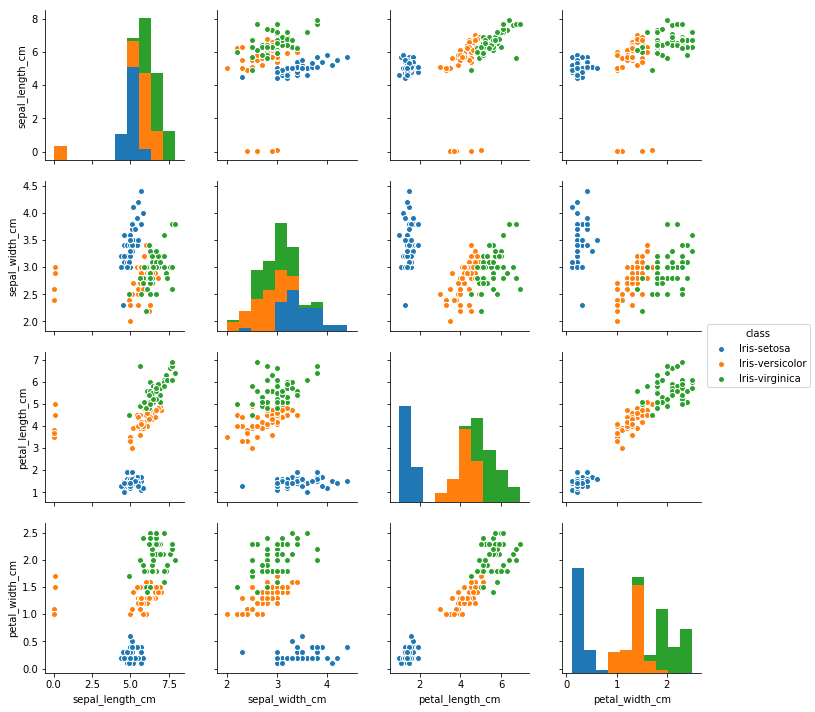

In [45]:
sb.pairplot(iris_data.dropna(),hue='class')

In [46]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


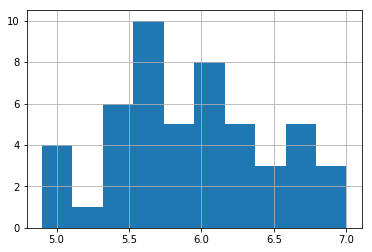

In [47]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0), 'sepal_length_cm']*=100.0
iris_data.loc[iris_data['class'] == 'Iris-versicolor','sepal_length_cm'].hist()

In [48]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class']=='Iris-setosa') & (iris_data['petal_width_cm'].isnull()),'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] =='Iris-setosa') & (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.251111,Iris-setosa
8,4.4,2.9,1.4,0.251111,Iris-setosa
9,4.9,3.1,1.5,0.251111,Iris-setosa
10,5.4,3.7,1.5,0.251111,Iris-setosa
11,4.8,3.4,1.6,0.251111,Iris-setosa


In [49]:
iris_data.to_csv('iris-data-clean.csv', index= False)
iris_data_clean= pd.read_csv('iris-data-clean.csv')


In [50]:
iris_data_clean=pd.read_csv('iris-data-clean.csv')
all_inputs=iris_data_clean[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values
all_classes=iris_data_clean['class'].values

In [51]:
from sklearn.model_selection import train_test_split
(training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs,all_classes,train_size=0.75,random_state=1)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [52]:
from sklearn.tree import DecisionTreeClassifier
#create the classifier
decision_tree_classifier = DecisionTreeClassifier()
#train
decision_tree_classifier.fit(training_inputs, training_classes)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
decision_tree_classifier.score(testing_inputs, testing_classes)
#predict
prediction = decision_tree_classifier.predict(testing_inputs)
#probablities
probs=decision_tree_classifier.predict_proba(testing_inputs)

print(prediction[:3])


['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [59]:
import numpy as np
sl=input('sepal length')
pl=input('petal length')
sw=input('sepal width')
pw=input('petal width')

ui=np.array([[sl,sw,pl,pw]])

prediction_result=decision_tree_classifier.predict(ui)

for i in prediction_result:
    print("your dimension result is :"+i.upper())

sepal length1
petal length2
sepal width3
petal width4
your dimension result is :IRIS-SETOSA
